<h1>Package Installation</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport

<h1>Importing Dataset</h1>

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')


<h1>Explanatory analysis and visualization</h1>

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
samplesubmission.head()

In [169]:
test.shape

(300, 36)

In [170]:
target = [col for col in train.columns if col not in test.columns]
target

['total_claim_amount']

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
#This pandas profiling which gives insights into the dataeset, such as type inference, essentials, Quantile statistics, Descriptive statistics ,Most frequent values, HistogramCorrelations Missing values matrix etc.


In [ ]:
train.profile_report()

In [392]:
newtrain = train.drop(['Customer_ID','_c39'], axis =1) #Customer_ID, It is not significant and we could drop it


In [393]:
newtest = test.drop(['Customer_ID','_c39'], axis =1) #c39, IT is all NA, we can drop it also

In [394]:
newtest.shape

(300, 34)

In [ ]:
#This is a personal interaction with some of the variables

In [ ]:
sns.boxplot(x= "insured_relationship", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.boxplot(x= "insured_sex", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.boxplot(x= "insured_education_level", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.boxplot(x= "insured_occupation", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.boxplot(x= "insured_hobbies", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.regplot(x= "incident_hour_of_the_day", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.regplot(x= "number_of_vehicles_involved", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.regplot(x= "age", y = "policy_number", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.regplot(x= "age", y = "bodily_injuries", data = newtrain)
plt.ylabel("Amount of claim")

In [ ]:
sns.regplot(x= "witnesses", y = "total_claim_amount", data = newtrain)
plt.ylabel("Amount of claim")

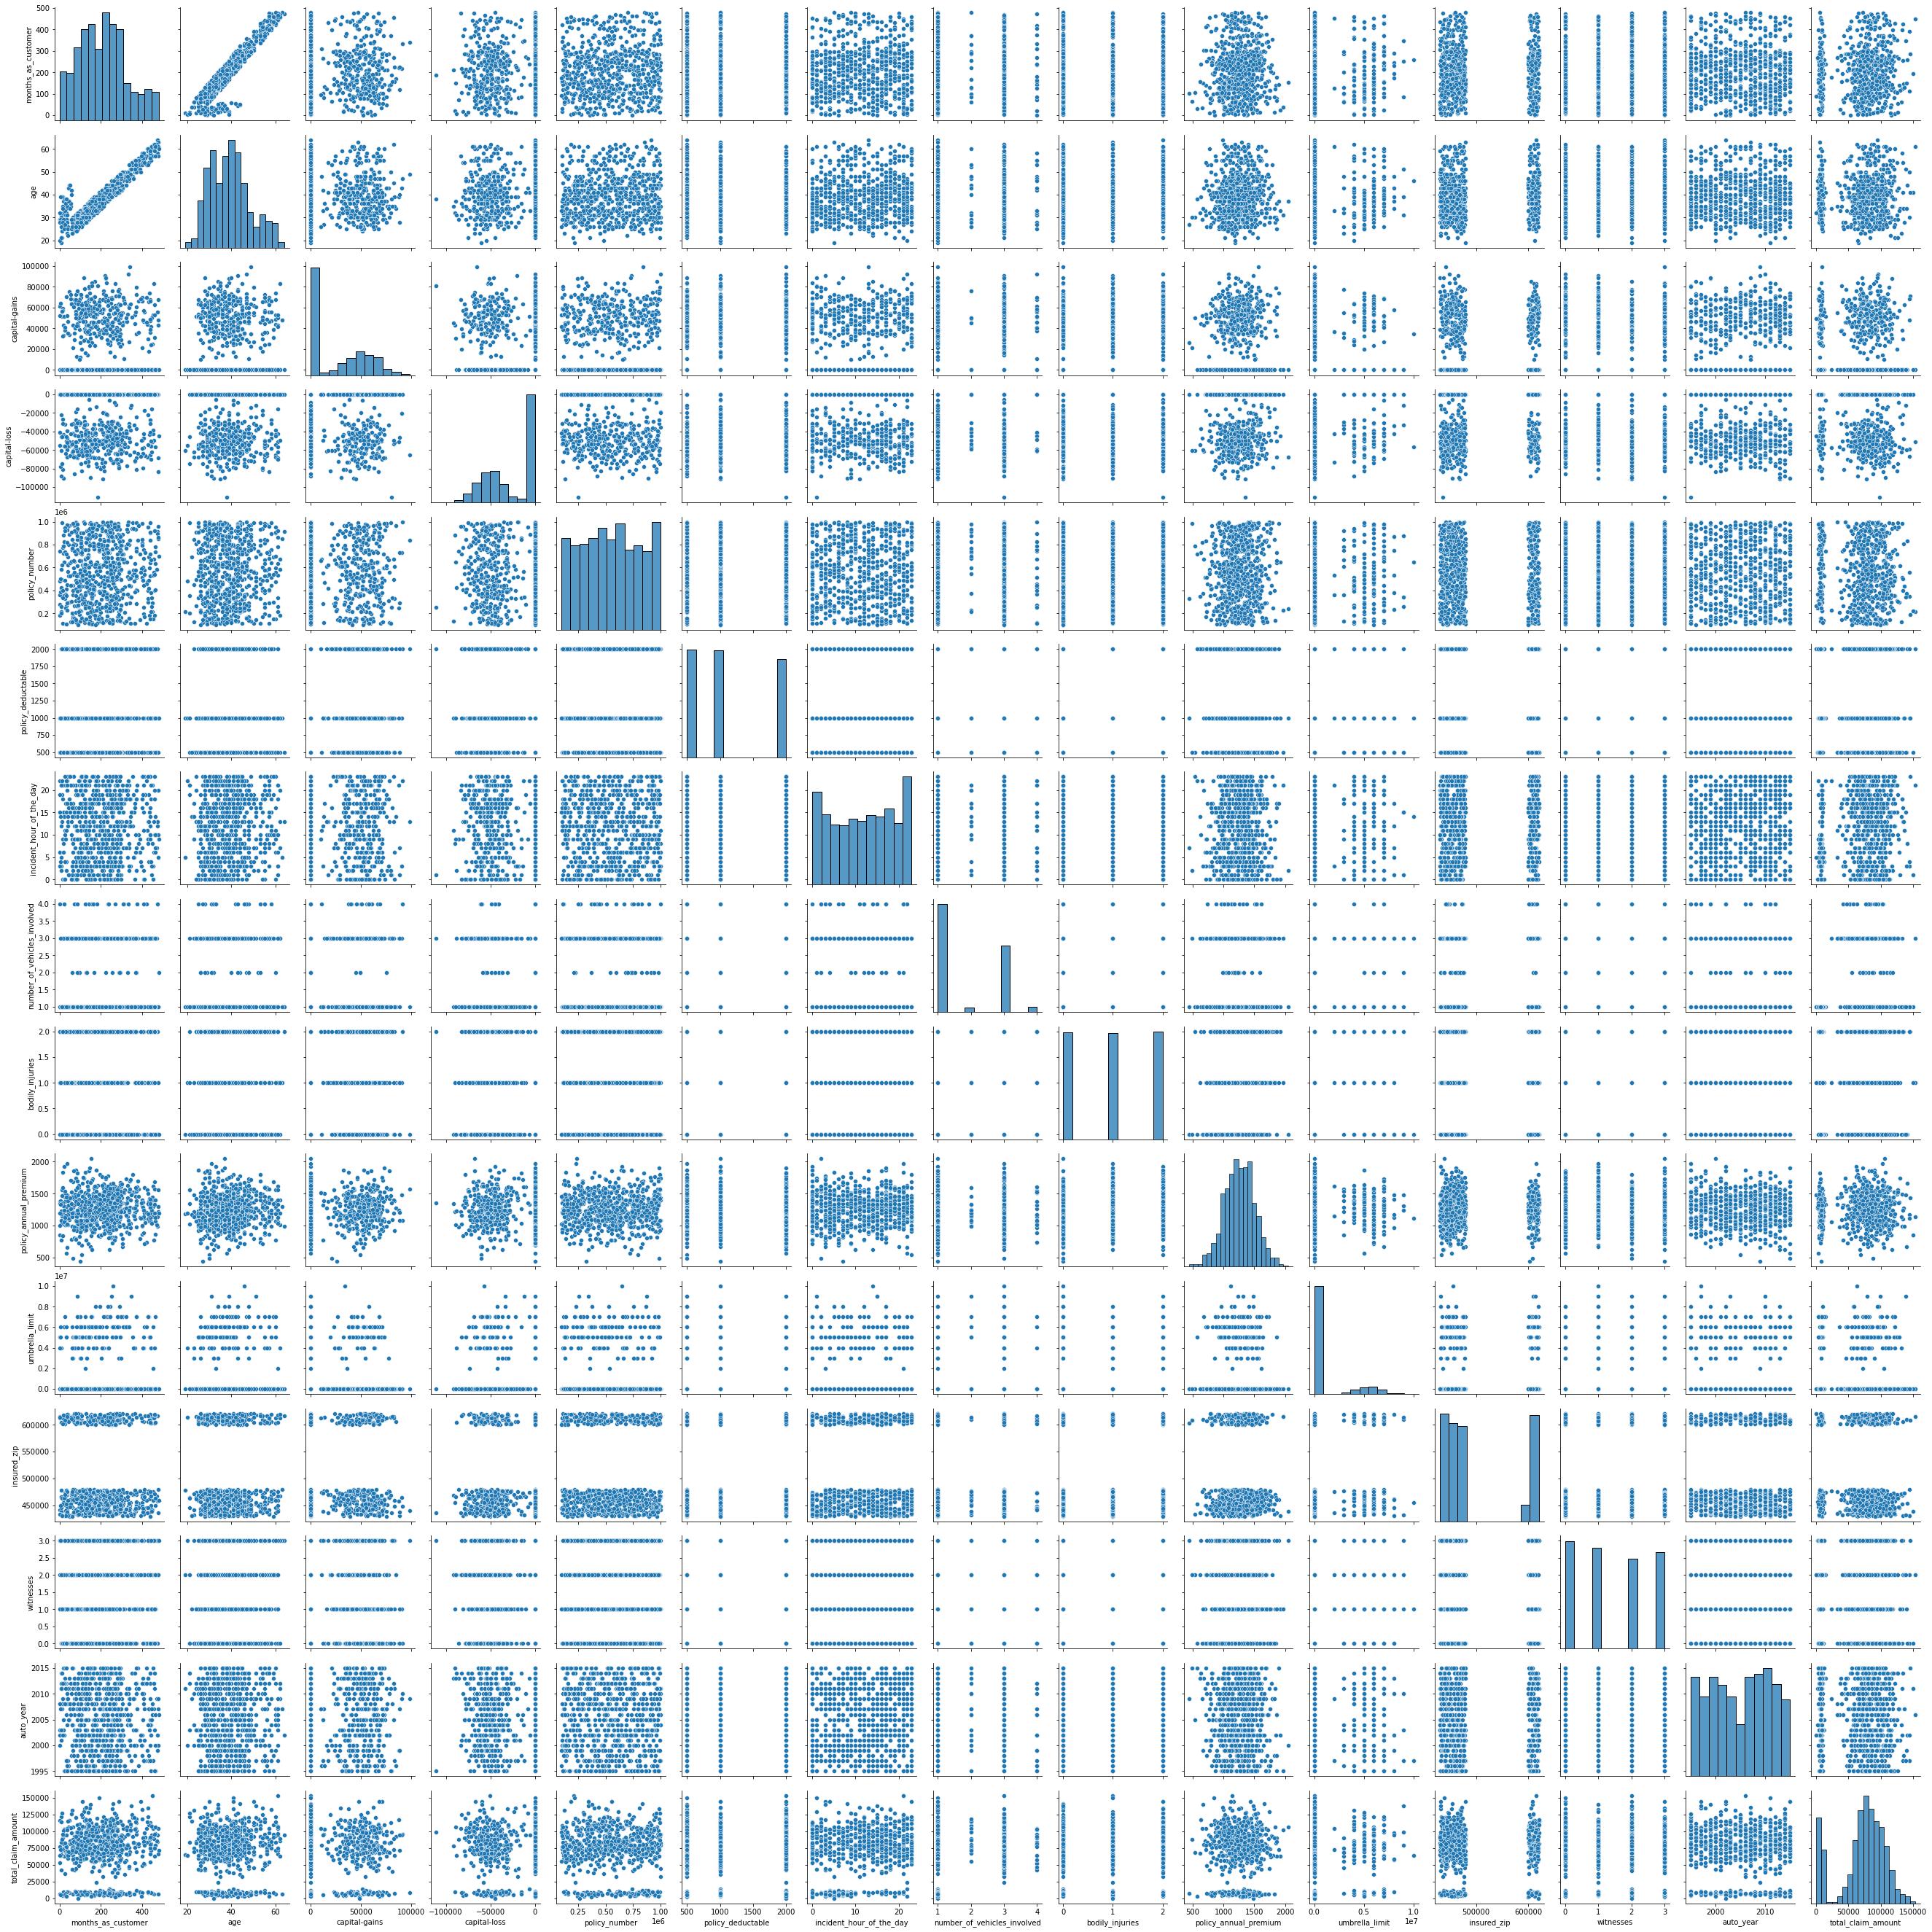

In [445]:
sns.pairplot(newtrain)

In [ ]:
X = newtrain.drop(['total_claim_amount'], axis = 'columns') # dropping the label variable
y = newtrain['total_claim_amount']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X = pd.get_dummies(x)
X.head()


In [ ]:
newtest = pd.get_dummies(newtest)
newtest.head()


In [399]:
X.shape

(700, 1590)

<h1>Model Building</h1>

In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train.total_claim_amount, test_size=0.4276, random_state=42)


<h1>Linear Regression Model</h1>

In [450]:
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [451]:
X_test.shape

(300, 1590)

In [ ]:
linearmodel.predict(X_test)
linearmodel_prediction = linearmodel.predict(X_test)
linearmodel_prediction

In [403]:
X_test.shape

(300, 1590)

In [454]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error (y_test, linearmodel_prediction)

In [455]:
MSE

541491569.078117

In [456]:
RMSE = np.sqrt(MSE)
RMSE

23269.971402606345

<h1>Random Forest</h1>

In [411]:
from sklearn.metrics import mean_squared_error

In [412]:
from sklearn.ensemble import RandomForestRegressor
randomforestmodel = RandomForestRegressor()
randomforestmodel.fit(X_train,y_train)

RandomForestRegressor()

In [413]:
randomforestmodel_prediction= randomforestmodel.predict(X_test)

In [ ]:
randomforestmodel_prediction

In [415]:
MSE = mean_squared_error (y_test, randomforestmodel_prediction)

In [416]:
MSE

407912115.0263719

In [417]:
RMSE = np.sqrt(MSE)

In [418]:
RMSE

20196.834282292162

<h1>XgBoost</h1>

In [420]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor(use_label_encoder=False)
xgboostmodel = xgboostmodel.fit(X_train, y_train)

In [421]:
xgboost_prediction= xgboostmodel.predict(X_test)

In [422]:
xgboost_prediction.shape

(300,)

In [423]:
MSE = mean_squared_error (y_test, xgboost_prediction)

In [424]:
RMSE = np.sqrt(MSE)
RMSE

21477.022003554976

<h1>Support Vector Machine</h1>

In [425]:
from sklearn.svm import SVR
SVMmodel = SVR()
SVMmodel.fit(X_train, y_train)
SVMmodel_prediction = SVMmodel.predict(X_test)

In [426]:
MSE = mean_squared_error (y_test, SVMmodel_prediction)
RMSE = np.sqrt(MSE)
RMSE

35966.10578128851

<h1>Decision Tree</h1>

In [427]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train,y_train)

DecisionTreeRegressor()

In [428]:
decisiontree_prediction = decisiontree.predict(X_test)

In [383]:
MSE = mean_squared_error (y_test, decisiontree_prediction)
RMSE = np.sqrt(MSE)
RMSE

27274.31992412037

<h1>Model Summary</h1>

In [5]:
from tabulate import tabulate
Modelsummary = [['Model', 'RSME'], ['Linear Regression',23270],['Random Forest',20196],['XgBoost',21477],['Support Vector Machine',35966],['Decision Tree',27274]]
print (tabulate(Modelsummary))

----------------------  -----
Model                   RSME
Linear Regression       23270
Random Forest           20196
XgBoost                 21477
Support Vector Machine  35966
Decision Tree           27274
----------------------  -----


<h4>The lowest RMSE is the Random Forest Model which is 20,196.</h4>

In [482]:
samplesubmission.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


In [312]:

submission_file= samplesubmission.copy()
submission_file.total_claim_amount=randomforestmodel_prediction



In [313]:
submission_file.head()

,Customer_ID,total_claim_amount
0,Customer_521,85547.9995
1,Customer_737,6124.6667
2,Customer_740,74905.5999
3,Customer_660,89634.6665
4,Customer_411,7256.6670


In [314]:
submission_file.to_csv('mye_first_submission.csv',index=False)